In [8]:
import scipy as sp, numpy as np
from sklearn.preprocessing import scale, StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import LeaveOneGroupOut, LeaveOneOut
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import copy
from scipy.optimize import least_squares
from scipy.stats import zscore
import time
import pandas as pd


# Get Data


X-Data

In [9]:
# Import Data
X0 = sp.io.loadmat('X48_0T.mat')['X_data_0T'] # load raw gene data with 0 for missing values

In [10]:
# Fill missing data with averages
def Average_Genes(X):
    # Return X with missing values averaged across columns
    X_avg = copy.deepcopy(X)
    num_col = len(X[0, :])
    num_row = len(X[:, 0])
    for col in range(num_col): # columns
        Num_NonZero = 0
        for row in range(num_row): # rows
            if X[row, col] == 0:
                Num_NonZero = Num_NonZero + 1
        if Num_NonZero != 25:
            Row_Avg = np.mean(X[:,col])*25/(25-Num_NonZero)

            for row in range(num_row): # rows
                if X[row, col] == 0:
                    X_avg[row, col] = Row_Avg;
    return X_avg

X_avg = Average_Genes(X0);

In [11]:
# Remove Non-Genes
X_avg = X_avg[:, 0:41000]
X0 = X0[:, 0:41000]

In [33]:
# Search for Nan in X_avg
def Find_nan(X):
    for col in range(len(X[0,:])):
        for row in range(len(X[:,0])):
            if np.isnan(X[row, col] is True):
                print(row, col)
Find_nan(X_avg)

Y-Data

In [12]:
# Load T data
Y = sp.io.loadmat('Y48_T.mat')['Y_data_T']

In [13]:
# Split Y Data
Time48 = Y[:, 0] # measurement time
Dose48 = Y[:,1] # radiation exposure in Gray
Patients48 = Y[:, 2]; # patient number

Reporter List

In [14]:
get_reporters = False
if get_reporters is True:
    t = time.time()

    Genes = pd.read_excel('BE188_Data.xlsx', sheet_name='Genes')
    Genes.values
    print(np.shape(Genes))
    Genes_T = np.transpose(Genes)

    elapsed = time.time() - t
    print('%f secomds elapsed' %elapsed)
else:
    pass

# Build Model with Entire Dataset

Percent Variance

In [46]:
def Normalize(X, Y):
    Xnorm = np.zeros((len(X[:,0]), len(X[0,:])))
    for col in range(len(X[0,:])):
        if np.sum(X[:,col]) != 0:
            Xnorm[:,col] = zscore(X[:,col])  # normalize the X data . This zscores the genes
        else:
            pass
    Ynorm = zscore(Y)  # normalize the Y data
    return Xnorm, Ynorm

X_avgNorm, DoseNorm = Normalize(X_avg, Dose48)
Find_nan(X_avgNorm)

def Plt_Variance(X, Y, num_components, title = 'Variance Explained'):
    Xnorm, Ynorm = Normalize(X, Y)
    
    variance_array = np.zeros(num_components) # calculate variance with different numbers of PLSR
    for i in range(1,num_components+1):
        plsr = PLSRegression(n_components = num_components) # go for 10
        plsr.fit_transform(Xnorm, Ynorm)
        variance_array[i-1] = 100*plsr.score(Xnorm,Ynorm)
    plt.scatter(range(1,num_components+1),variance_array)
    plt.title(title)
    plt.xlabel("Num Principal Components")
    plt.ylabel("Percent Variance Explained")
    plt.show()
    
Plt_Variance(X_avg, Dose48, 10)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2253: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


72
76
182
352
392
418
435
438
450
484
566
574
602
633
677
682
698
737
822
829
857
863
905
909
925
929
952
1001
1020
1055
1094
1147
1242
1257
1262
1289
1295
1297
1304
1320
1321
1540
1814
1865
1914
1923
1925
1952
1999
2022
2078
2080
2114
2126
2154
2185
2186
2217
2259
2294
2308
2371
2389
2398
2455
2484
2536
2722
2735
2743
2825
2872
2877
2899
2903
2907
2922
2937
3110
3133
3183
3185
3279
3315
3397
3440
3441
3461
3469
3480
3505
3567
3583
3590
3646
3650
3692
3703
3795
3822
3881
4003
4005
4027
4234
4235
4267
4290
4317
4343
4372
4486
4503
4520
4531
4543
4615
4647
4695
4742
4747
4772
4789
4919
4927
5020
5032
5061
5205
5225
5238
5343
5366
5372
5399
5482
5487
5563
5608
5624
5768
5794
5854
5877
6004
6096
6163
6212
6217
6316
6366
6368
6425
6477
6546
6621
6790
6857
6866
6913
6977
6979
7014
7043
7048
7086
7091
7137
7158
7256
7279
7290
7446
7476
7615
7708
7750
7760
7767
7776
7789
7870
7911
7934
7966
7979
8005
8021
8046
8157
8266
8297
8330
8335
8362
8368
8369
8421
8435
8466
8545
8560
8592
8827
8831
8858

34429
34439
34446
34463
34470
34479
34502
34506
34518
34525
34528
34533
34547
34578
34588
34634
34637
34645
34668
34717
34772
34783
34812
34840
34842
34867
34888
34890
34941
34943
34995
34997
35017
35020
35039
35040
35095
35105
35114
35124
35132
35176
35193
35223
35236
35244
35247
35252
35258
35270
35305
35332
35389
35393
35446
35482
35540
35572
35608
35620
35651
35681
35714
35732
35754
35798
35902
35910
35923
35943
35963
35988
35989
36022
36027
36037
36041
36050
36060
36138
36155
36171
36175
36180
36205
36283
36301
36319
36359
36363
36365
36367
36389
36396
36434
36445
36474
36559
36570
36575
36584
36611
36624
36640
36655
36680
36682
36694
36720
36738
36741
36781
36794
36830
36845
36846
36950
36978
37004
37022
37056
37069
37076
37088
37118
37151
37172
37181
37229
37231
37268
37300
37302
37304
37341
37373
37393
37472
37501
37548
37568
37588
37596
37627
37628
37637
37648
37650
37651
37691
37721
37733
37740
37821
37841
37844
37884
37947
37951
37996
38032
38041
38068
38080
38102
38104
3811

30767
30772
30781
30815
30832
30841
30865
30867
30874
30875
30888
30892
30898
30899
30900
30917
30920
30931
30934
30943
30962
30971
30988
30997
31000
31002
31023
31027
31034
31052
31055
31056
31062
31068
31077
31087
31096
31111
31115
31139
31145
31148
31154
31169
31170
31176
31193
31194
31211
31227
31237
31242
31251
31259
31265
31267
31273
31280
31290
31291
31305
31311
31324
31326
31331
31334
31346
31351
31365
31370
31377
31378
31384
31402
31403
31409
31415
31420
31426
31440
31444
31445
31449
31460
31464
31466
31475
31477
31480
31489
31493
31505
31507
31508
31513
31516
31518
31521
31527
31549
31551
31553
31561
31574
31579
31591
31609
31610
31620
31628
31637
31651
31653
31672
31675
31676
31681
31685
31688
31693
31701
31720
31725
31727
31729
31734
31736
31743
31746
31749
31755
31760
31774
31779
31781
31789
31793
31801
31802
31819
31821
31834
31838
31844
31846
31861
31868
31874
31882
31884
31887
31889
31894
31898
31899
31907
31915
31923
31926
31941
31942
31943
31944
31946
31947
31948
3195

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Print Scores

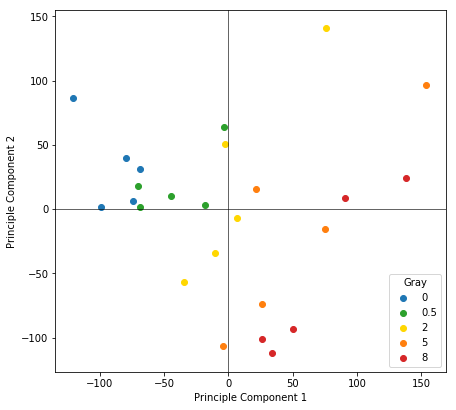

In [43]:
# Setup PLSR for scores
def Plt_Scores(X, Y, xbound = None, ybound = None, save = False):
    # input unnormalized data
    
    Xnorm, Ynorm = Normalize(X, Y)
    plsrScore = PLSRegression(n_components = 2)
    plsrScore.fit(Xnorm,Ynorm)
    scores = plsrScore.x_scores_ 

    # Plot scores
    Doses = [0, 0.5, 2, 5, 8]
    iDoses = ['i0','i0_5', 'i2', 'i5', 'i8']
    colors = ['tab:blue', 'tab:green', 'gold', 'tab:orange', 'tab:red']
    
    fig, axs = plt.subplots(figsize = (7,7))
    for i, dose in enumerate(Doses):
        iDoses[i] = np.where(Dose48 == Doses[i])[0] # Get indices of each dosage
        plt.scatter(scores[iDoses[i],0],scores[iDoses[i],1], c = colors[i], label = Doses[i]) # plot scores by radiation level

    # Format plot
    plt.legend(title = 'Gray', loc = 'lower right')
    plt.axhline(y = 0, color = 'k', linestyle = '-', linewidth = 0.6)
    plt.axvline(x = 0, color = 'k', linestyle = '-', linewidth = 0.6)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.xlim(xbound)
    plt.ylim(ybound)
    axs.set_aspect('equal')
    if save is True:
        plt.savefig('Scores.png', bbox_inches = 'tight')
        
Plt_Scores(X0, Dose48)